# Data Pre Processing

## Introduction
Here given the data set of Employess with the columns as company,age,salary,place and gender.So company,place are all categorical columns and age and salary,gender gives us the numerical values in the table.This preprocessing includes the removal of unnecessary data with null values and removal of outliers ,changing those categorical value to numerical values by feature scaling inorder to show some analysis . 

### Data Dictionary
Company consist of mail 3 companies(tcs,infosys,cts),Age at a range of numbers ,places are the different parts of india and country is just indiafor all the datas.Gender shows two values with 1 and 0.


# Importing Libraries

In [186]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [188]:
Data = pd.read_csv('Employee.csv')


# Data Exploration

In [189]:
Data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [190]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [191]:
Data.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [192]:
#Finding null values sum in each colums
Data.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [193]:
rows = Data[pd.isna(Data['Company'])]
rows

,Company,Age,Salary,Place,Country,Gender
37,NaN,35.0,NaN,Hyderabad,India,0
51,NaN,24.0,3000.0,Mumbai,India,0
61,NaN,25.0,8943.0,NaN,India,1
64,NaN,25.0,6543.0,Noida,India,0
109,NaN,33.0,NaN,Calcutta,India,0
123,NaN,NaN,3454.0,Calcutta,India,0
133,NaN,22.0,8943.0,Chennai,India,0
136,NaN,NaN,NaN,Delhi,India,0


In [194]:
# As per the criteria age values with Nan is replace by 0 
Data['Age'] = Data['Age'].fillna(0)

# filled all null value with 'Unknown'
Data = Data.fillna('Unknown')

In [195]:
#Finding the unique Company names and replacing the duplicate names with the single names for data consistency.
value = Data['Company'].unique()
value

array(['TCS', 'Infosys', 'CTS', 'Unknown', 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [196]:
Data['Company'] = Data['Company'].replace('Tata Consultancy Services','TCS')
Data['Company'] = Data['Company'].replace('Infosys Pvt Lmt','Infosys')
Data['Company'] = Data['Company'].replace('Congnizant','CTS')
value = Data['Company'].unique()
value

array(['TCS', 'Infosys', 'CTS', 'Unknown'], dtype=object)

In [197]:
#Finding the median of salaries grouped by each companies and replacing those values with the median found.
Data['Salary'] = Data['Salary'].replace('Unknown',0)
median_TcsSalary = Data[Data['Company'] == 'TCS']['Salary'].median()
median_InfosysSalary = Data[Data['Company'] == 'Infosys']['Salary'].median()
median_CtsSalary = Data[Data['Company'] == 'CTS']['Salary'].median()

In [198]:
Data.loc[Data['Company'] == 'TCS', 'Salary'] = Data.loc[Data['Company'] == 'TCS', 'Salary'].replace(0, median_TcsSalary)
Data.loc[Data['Company'] == 'Infosys', 'Salary'] = Data.loc[Data['Company'] == 'Infosys', 'Salary'].replace(0, median_InfosysSalary)
Data.loc[Data['Company'] == 'CTS', 'Salary'] = Data.loc[Data['Company'] == 'CTS', 'Salary'].replace(0, median_CtsSalary)

In [199]:
Data.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5009.0,Chennai,India,0
1,Infosys,30.0,4034.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [200]:
row = Data.loc[Data['Age'] == 0]
row

,Company,Age,Salary,Place,Country,Gender
5,Infosys,0.0,5000.0,Calcutta,India,0
6,TCS,0.0,6000.0,Chennai,India,1
23,Infosys,0.0,5835.0,Cochin,India,0
24,TCS,0.0,7084.0,Chennai,India,1
41,Infosys,0.0,5000.0,Unknown,India,0
42,TCS,0.0,6000.0,Unknown,India,0
59,Infosys,0.0,5835.0,Mumbai,India,0
60,TCS,0.0,7084.0,Calcutta,India,0
77,Infosys,0.0,5000.0,Hyderabad,India,0
78,TCS,0.0,6000.0,Calcutta,India,0


In [201]:
#removal of duplicated rows 
duplicated_rows = Data[Data.duplicated()]
print('Duplicated Rows:')
print(duplicated_rows)

Duplicated Rows:
     Company   Age  Salary     Place Country  Gender
84       CTS  43.0  1634.0    Mumbai   India       0
130      TCS  21.0  4824.0    Mumbai   India       0
131  Infosys   0.0  5835.0    Mumbai   India       0
144  Infosys  22.0  8787.0  Calcutta   India       1


In [202]:
df=Data.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


In [203]:
#finding unique places ,country and gender
df.loc[df['Place'] == 'Nan'] = df.loc[df['Place'] == 'Nan'].replace('Nan','Unknown')
places = df['Place'].unique()
places

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       'Unknown', 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [204]:
countries =df['Country'].unique()
countries

array(['India'], dtype=object)

In [205]:
genders = df['Gender'].unique()
genders

array([0, 1], dtype=int64)

In [206]:
# The only country in the data is India so we can avoid that column
df.drop('Country',axis = 1,inplace = True)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


In [208]:
# finding outliers with percentile method 
upper_limit = df['Salary'].quantile(0.95)
lower_limit = df['Salary'].quantile(0.05)
upper_limit

9024.0

In [209]:
lower_limit

1234.0

In [210]:
#removing outliers
new_df = df[(df['Salary']<=upper_limit) & (df['Salary']>=lower_limit)]
new_df

,Company,Age,Salary,Place,Gender
0,TCS,20.0,5009.0,Chennai,0
1,Infosys,30.0,4034.0,Mumbai,0
2,TCS,35.0,2300.0,Calcutta,0
3,Infosys,40.0,3000.0,Delhi,0
4,TCS,23.0,4000.0,Mumbai,0
...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,0
143,TCS,33.0,9024.0,Calcutta,1
145,Infosys,44.0,4034.0,Delhi,1
146,TCS,33.0,5034.0,Mumbai,1


In [211]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 147
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  131 non-null    object 
 1   Age      131 non-null    float64
 2   Salary   131 non-null    float64
 3   Place    131 non-null    object 
 4   Gender   131 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.1+ KB


In [212]:
filtered_data = new_df[(new_df['Age']>40) & (new_df['Salary']<5000)]
filtered_data

,Company,Age,Salary,Place,Gender
12,CTS,45.0,1634.0,Chennai,0
21,Infosys,50.0,3184.0,Delhi,0
32,Infosys,45.0,4034.0,Calcutta,0
39,Infosys,41.0,3000.0,Mumbai,0
48,CTS,43.0,1634.0,Mumbai,0
50,Infosys,41.0,3000.0,Chennai,0
57,Infosys,51.0,3184.0,Hyderabad,0
66,CTS,41.0,1634.0,Calcutta,0
68,Infosys,43.0,4034.0,Mumbai,0
75,Infosys,44.0,3000.0,Cochin,0


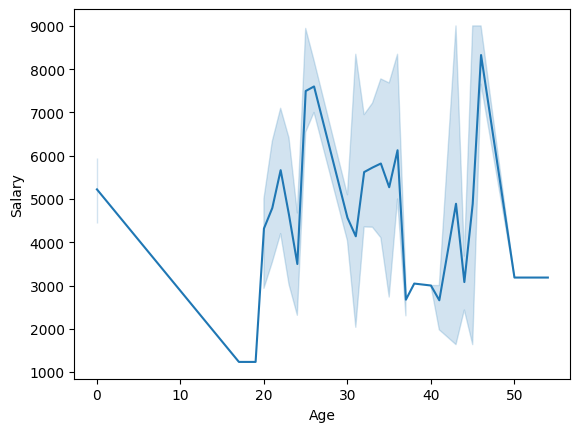

In [213]:
#Plot the chart with Age and Salary
line_chart = sns.lineplot(x=new_df['Age'],y=new_df['Salary'])

         Place  person_count
0       Bhopal             1
1     Calcutta            29
2      Chennai            13
3       Cochin            13
4        Delhi            12
5    Hyderabad             7
6       Mumbai            32
7       Nagpur             1
8        Noida             7
9   Podicherry             2
10        Pune             2
11     Unknown            12


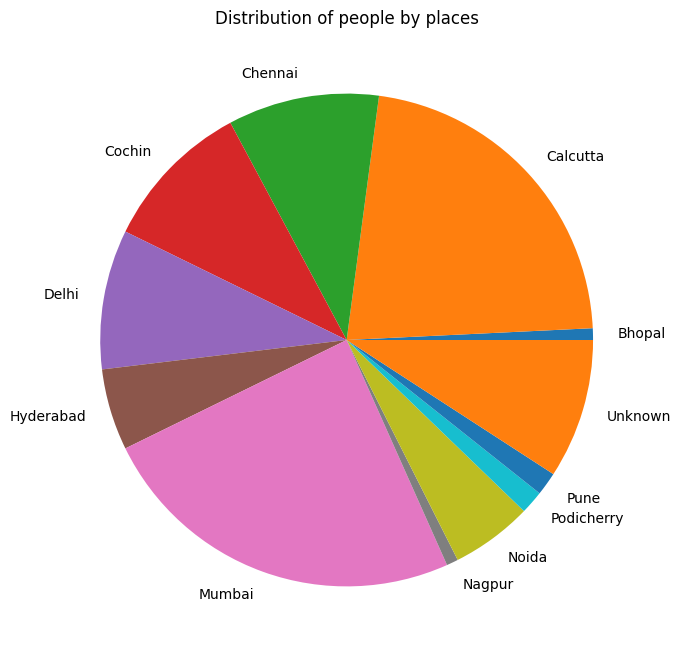

In [214]:
#Count the number of people from each place and represent it visually
count_fromplace = new_df.groupby('Place').size().reset_index(name='person_count')
print(count_fromplace)

plt.figure(figsize=(8, 8))
pie_plot = plt.pie(count_fromplace['person_count'],labels = count_fromplace['Place'],)
plt.title('Distribution of people by places')
plt.show()

# Encoding the categorical date 

In [215]:
#encoding the categorical values such as companies
df_one_hot_encoded = pd.get_dummies(data = new_df, columns = ["Company"])

print(df_one_hot_encoded )


      Age  Salary     Place  Gender  Company_CTS  Company_Infosys  \
0    20.0  5009.0   Chennai       0        False            False   
1    30.0  4034.0    Mumbai       0        False             True   
2    35.0  2300.0  Calcutta       0        False            False   
3    40.0  3000.0     Delhi       0        False             True   
4    23.0  4000.0    Mumbai       0        False            False   
..    ...     ...       ...     ...          ...              ...   
142  22.0  8202.0    Mumbai       0        False             True   
143  33.0  9024.0  Calcutta       1        False            False   
145  44.0  4034.0     Delhi       1        False             True   
146  33.0  5034.0    Mumbai       1        False            False   
147  22.0  8202.0    Cochin       0        False             True   

     Company_TCS  Company_Unknown  
0           True            False  
1          False            False  
2           True            False  
3          False           

In [216]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [224]:
cols_to_encode = ["Company", "Place"]
new_encoded_cols_names = []

# Create a list of new columns names
for col in cols_to_encode:
    new_encoded_cols_names += [f"is_{category}" for category in df[col].unique().tolist()]

print(new_encoded_cols_names)

# Inititalize and fit One Hot Encoder class from sklearn
one_hot_encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_cols = one_hot_encoder.fit_transform(df[cols_to_encode])

# As the output of the above transformer would be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded = pd.DataFrame(encoded_cols, columns = new_encoded_cols_names)
one_hot_encoded_df = new_df.join(df_encoded)

print(one_hot_encoded_df)


['is_TCS', 'is_Infosys', 'is_CTS', 'is_Unknown', 'is_Chennai', 'is_Mumbai', 'is_Calcutta', 'is_Delhi', 'is_Podicherry', 'is_Cochin', 'is_Unknown', 'is_Noida', 'is_Hyderabad', 'is_Bhopal', 'is_Nagpur', 'is_Pune']
     Company   Age  Salary     Place  Gender  is_TCS  is_Infosys  is_CTS  \
0        TCS  20.0  5009.0   Chennai       0     0.0         0.0     1.0   
1    Infosys  30.0  4034.0    Mumbai       0     0.0         1.0     0.0   
2        TCS  35.0  2300.0  Calcutta       0     0.0         0.0     1.0   
3    Infosys  40.0  3000.0     Delhi       0     0.0         1.0     0.0   
4        TCS  23.0  4000.0    Mumbai       0     0.0         0.0     1.0   
..       ...   ...     ...       ...     ...     ...         ...     ...   
142  Infosys  22.0  8202.0    Mumbai       0     0.0         0.0     1.0   
143      TCS  33.0  9024.0  Calcutta       1     0.0         1.0     0.0   
145  Infosys  44.0  4034.0     Delhi       1     NaN         NaN     NaN   
146      TCS  33.0  5034.0  

In [225]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in new_df:
    new_df[i] = label_encoder.fit_transform(new_df[i])

In [226]:
new_df

,Company,Age,Salary,Place,Gender
0,2,4,18,2,0
1,1,11,13,6,0
2,2,16,3,1,0
3,1,20,5,4,0
4,2,7,12,6,0
...,...,...,...,...,...
142,1,6,32,6,0
143,2,14,37,1,1
145,1,23,13,4,1
146,2,14,19,6,1


# Feature Scaling

In [227]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [228]:
scaler =StandardScaler()
scaler.fit(new_df)
scaled_data = scaler.transform(new_df)
print(scaled_data)

[[ 0.86307571 -0.87219567  0.11192201 -0.83635332 -0.49761335]
 [-0.33972129  0.         -0.31182894  0.45261474 -0.49761335]
 [ 0.86307571  0.62299691 -1.15933084 -1.15859534 -0.49761335]
 [-0.33972129  1.12139444 -0.98983046 -0.19186929 -0.49761335]
 [ 0.86307571 -0.49839753 -0.39657913  0.45261474 -0.49761335]
 [-0.33972129 -1.3705932   0.02717182 -1.15859534 -0.49761335]
 [ 0.86307571 -1.3705932   0.70517334 -0.83635332  2.00959238]
 [-0.33972129 -0.49839753  0.95942391  0.45261474  2.00959238]
 [ 0.86307571  0.49839753  1.21367448 -1.15859534  2.00959238]
 [-1.54251829  1.61979196  1.63742543 -0.19186929 -0.49761335]
 [-1.54251829 -0.49839753 -1.32883122  0.45261474 -0.49761335]
 [-1.54251829  1.61979196 -1.32883122 -0.83635332 -0.49761335]
 [-1.54251829 -1.12139444 -1.41358141  0.45261474 -0.49761335]
 [-0.33972129  1.12139444 -0.98983046 -1.15859534 -0.49761335]
 [ 0.86307571 -0.49839753 -0.98983046 -0.19186929 -0.49761335]
 [-0.33972129 -0.49839753 -0.90508027  1.41934079 -0.49

In [229]:
#using MinMaxScaler

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(new_df)
minmax_scaled_data = minmax_scaler.transform(new_df)
print(minmax_scaled_data)

[[0.66666667 0.14285714 0.48648649 0.18181818 0.        ]
 [0.33333333 0.39285714 0.35135135 0.54545455 0.        ]
 [0.66666667 0.57142857 0.08108108 0.09090909 0.        ]
 [0.33333333 0.71428571 0.13513514 0.36363636 0.        ]
 [0.66666667 0.25       0.32432432 0.54545455 0.        ]
 [0.33333333 0.         0.45945946 0.09090909 0.        ]
 [0.66666667 0.         0.67567568 0.18181818 1.        ]
 [0.33333333 0.25       0.75675676 0.54545455 1.        ]
 [0.66666667 0.53571429 0.83783784 0.09090909 1.        ]
 [0.         0.85714286 0.97297297 0.36363636 0.        ]
 [0.         0.25       0.02702703 0.54545455 0.        ]
 [0.         0.85714286 0.02702703 0.18181818 0.        ]
 [0.         0.07142857 0.         0.54545455 0.        ]
 [0.33333333 0.71428571 0.13513514 0.09090909 0.        ]
 [0.66666667 0.25       0.13513514 0.36363636 0.        ]
 [0.33333333 0.25       0.16216216 0.81818182 0.        ]
 [0.66666667 0.53571429 0.45945946 0.27272727 0.        ]
 [0.66666667 0